In [1]:
import tensorflow as tf

In [2]:
!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 5.3MB 13.5MB/s 
     |████████████████████████████████| 51kB 9.9MB/s 
     |████████████████████████████████| 133kB 63.1MB/s 
     |████████████████████████████████| 112kB 63.9MB/s 
{"username":"kavyadevanapalli","key":"831d65d1dba903adf5b09e15e1e32fae"}

In [3]:
!kaggle competitions download -c dogs-vs-cats -p  /content/drive/MyDrive/Dataset_catdog

 94% 256M/271M [00:02<00:00, 118MB/s]
100% 271M/271M [00:02<00:00, 117MB/s]
100% 541M/543M [00:03<00:00, 204MB/s]
100% 543M/543M [00:03<00:00, 164MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 12.1MB/s]


In [4]:
!unzip '/content/drive/My Drive/Dataset_catdog/train.zip'
!unzip '/content/drive/My Drive/Dataset_catdog/test1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [6]:
!mkdir /content/drive/MyDrive/cat_dog

In [9]:
!mkdir /content/drive/MyDrive/cat_dog/train

mkdir: cannot create directory ‘/content/drive/MyDrive/cat_dog/train’: File exists


In [10]:
!mkdir /content/drive/MyDrive/cat_dog/train/{dog,cat}

In [11]:
!mkdir /content/drive/MyDrive/cat_dog/test

In [12]:
!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} /content/drive/MyDrive/cat_dog/train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} /content/drive/MyDrive/cat_dog/train/cat
!find test1 -maxdepth 1 -type f | xargs -I{} mv {} /content/drive/MyDrive/cat_dog/test

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [14]:
IMAGE_SIZE = [224, 224]
train_path = "/content/drive/MyDrive/cat_dog/train"
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [15]:
for layer in vgg16.layers:
    layer.trainable = False

In [17]:
folders = glob("/content/drive/MyDrive/cat_dog/train/*")

['/content/drive/MyDrive/cat_dog/train/dog', '/content/drive/MyDrive/cat_dog/train/cat']


In [18]:
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)

In [23]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/cat_dog/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,subset='training',
                                                 class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [24]:
validation_set = train_datagen.flow_from_directory("/content/drive/MyDrive/cat_dog/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,subset='validation',
                                                 class_mode = 'categorical')

Found 5000 images belonging to 2 classes.


In [25]:
final = model.fit_generator(training_set, validation_data=validation_set, epochs=50,
                            steps_per_epoch=len(training_set),validation_steps=len(validation_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
625/625 [==============================] - 129s 192ms/step - loss: 0.3222 - accuracy: 0.8668 - val_loss: 0.2291 - val_accuracy: 0.9158
Epoch 2/50
625/625 [==============================] - 119s 190ms/step - loss: 0.1488 - accuracy: 0.9405 - val_loss: 0.2125 - val_accuracy: 0.9254
Epoch 3/50
625/625 [==============================] - 118s 189ms/step - loss: 0.0854 - accuracy: 0.9663 - val_loss: 0.2671 - val_accuracy: 0.9128
Epoch 4/50
625/625 [==============================] - 119s 190ms/step - loss: 0.0920 - accuracy: 0.9616 - val_loss: 0.2380 - val_accuracy: 0.9274
Epoch 5/50
625/625 [==============================] - 120s 192ms/step - loss: 0.0547 - accuracy: 0.9788 - val_loss: 0.2471 - val_accuracy: 0.9276
Epoch 6/50
625/625 [==============================] - 120s 192ms/step - loss: 0.0459 - accuracy: 0.9826 - val_loss: 0.2568 - val_accuracy: 0.9230
Epoch 7/50
625/625 [==============================] - 120s 191ms/step - loss: 0.0322 - accuracy: 0.9888 - val_loss: 0.2803 -

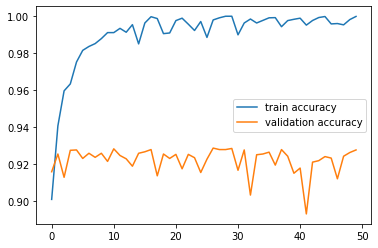

In [26]:
import matplotlib.pyplot as plt
plt.plot(final.history['accuracy'], label='train accuracy')
plt.plot(final.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [27]:
from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/cat_dog/cat_dog.pkl")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/cat_dog/cat_dog.pkl/assets


In [28]:
from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/cat_dog/cat_dog.h5")

In [141]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

In [145]:
training_set.class_indices

{'cat': 0, 'dog': 1}

In [144]:
def prediction(image_path):
  img= image.load_img(image_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = x*(1./225)
  x=np.expand_dims(x,axis=0)
  img_data=preprocess_input(x)
  a=np.argmax(model.predict(img_data), axis=1)
  if a == 0:
    return "cat"
  else:
    return "dog"

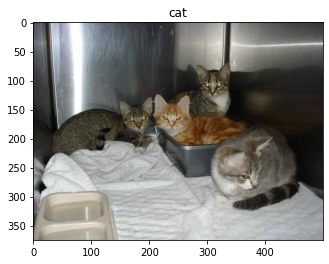

In [148]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
a = mpimg.imread("/content/drive/MyDrive/cat_dog/test/12500.jpg")
plt.imshow(a)
plt.title(prediction("/content/drive/MyDrive/cat_dog/test/12500.jpg"))
plt.show()